Load and Import the data

In [2]:
import pandas as pd
import numpy as numpy
df=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Metro_Interstate_Traffic_Volume.csv')
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


Data Preprocessing

In [3]:
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00


Feature Extraction

In [4]:
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.dayofweek
df['month'] = df['date_time'].dt.month
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,hour,day_of_week,month
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,9,1,10
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,10,1,10
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,11,1,10
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,12,1,10
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,13,1,10


Checking for null values

In [5]:
df.isnull().sum()

traffic_volume             0
holiday                48143
temp                       0
rain_1h                    0
snow_1h                    0
clouds_all                 0
weather_main               0
weather_description        0
date_time                  0
hour                       0
day_of_week                0
month                      0
dtype: int64

Handling missing values

In [6]:
df['holiday'].fillna('No Holiday', inplace=True)
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,hour,day_of_week,month
0,5545,No Holiday,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,9,1,10
1,4516,No Holiday,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,10,1,10
2,4767,No Holiday,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,11,1,10
3,5026,No Holiday,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,12,1,10
4,4918,No Holiday,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,13,1,10


Encoded categorical variables

In [7]:
# One-hot encode the 'holiday', 'weather_main', and 'weather_description' columns
df = pd.get_dummies(df, columns=['holiday', 'weather_main', 'weather_description'], drop_first=True)

In [8]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,date_time,hour,day_of_week,month,holiday_Columbus Day,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,5545,288.28,0.0,0.0,40,2012-10-02 09:00:00,9,1,10,False,...,False,False,False,False,False,False,False,False,False,False
1,4516,289.36,0.0,0.0,75,2012-10-02 10:00:00,10,1,10,False,...,False,False,False,False,False,False,False,False,False,False
2,4767,289.58,0.0,0.0,90,2012-10-02 11:00:00,11,1,10,False,...,False,False,False,False,False,False,False,False,False,False
3,5026,290.13,0.0,0.0,90,2012-10-02 12:00:00,12,1,10,False,...,False,False,False,False,False,False,False,False,False,False
4,4918,291.14,0.0,0.0,75,2012-10-02 13:00:00,13,1,10,False,...,False,False,False,False,False,False,False,False,False,False


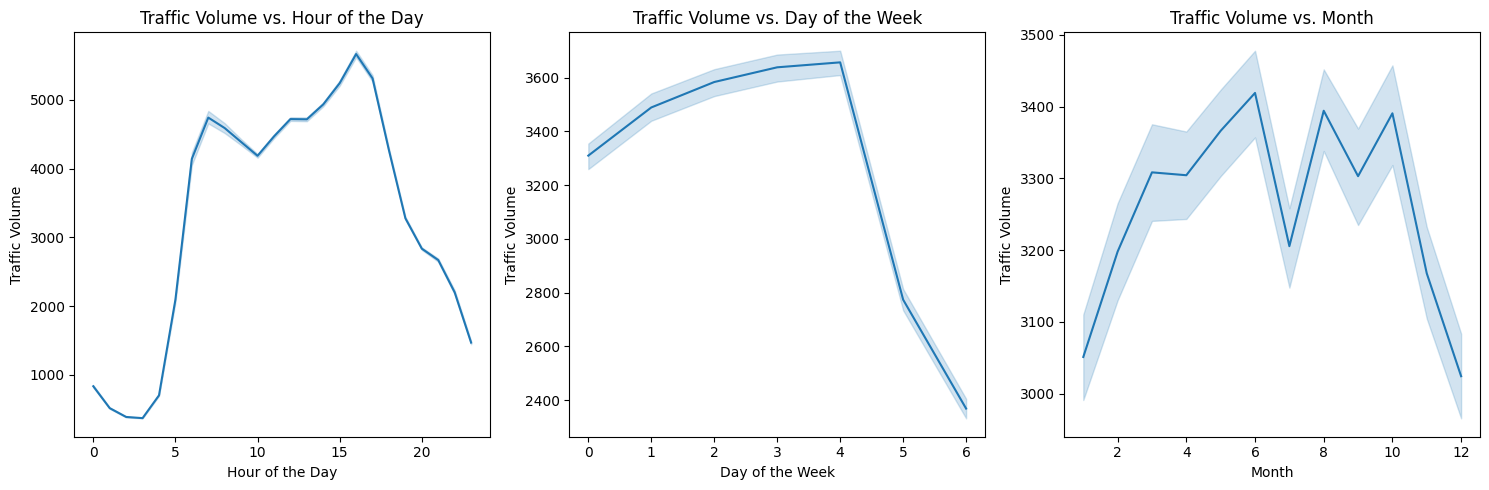

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the visualizations
plt.figure(figsize=(15, 5))

# Traffic Volume vs. Hour of the Day
plt.subplot(1, 3, 1)
sns.lineplot(data=df, x='hour', y='traffic_volume')
plt.title('Traffic Volume vs. Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')

# Traffic Volume vs. Day of the Week
plt.subplot(1, 3, 2)
sns.lineplot(data=df, x='day_of_week', y='traffic_volume')
plt.title('Traffic Volume vs. Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Volume')

# Traffic Volume vs. Month
plt.subplot(1, 3, 3)
sns.lineplot(data=df, x='month', y='traffic_volume')
plt.title('Traffic Volume vs. Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')

plt.tight_layout()
plt.show()

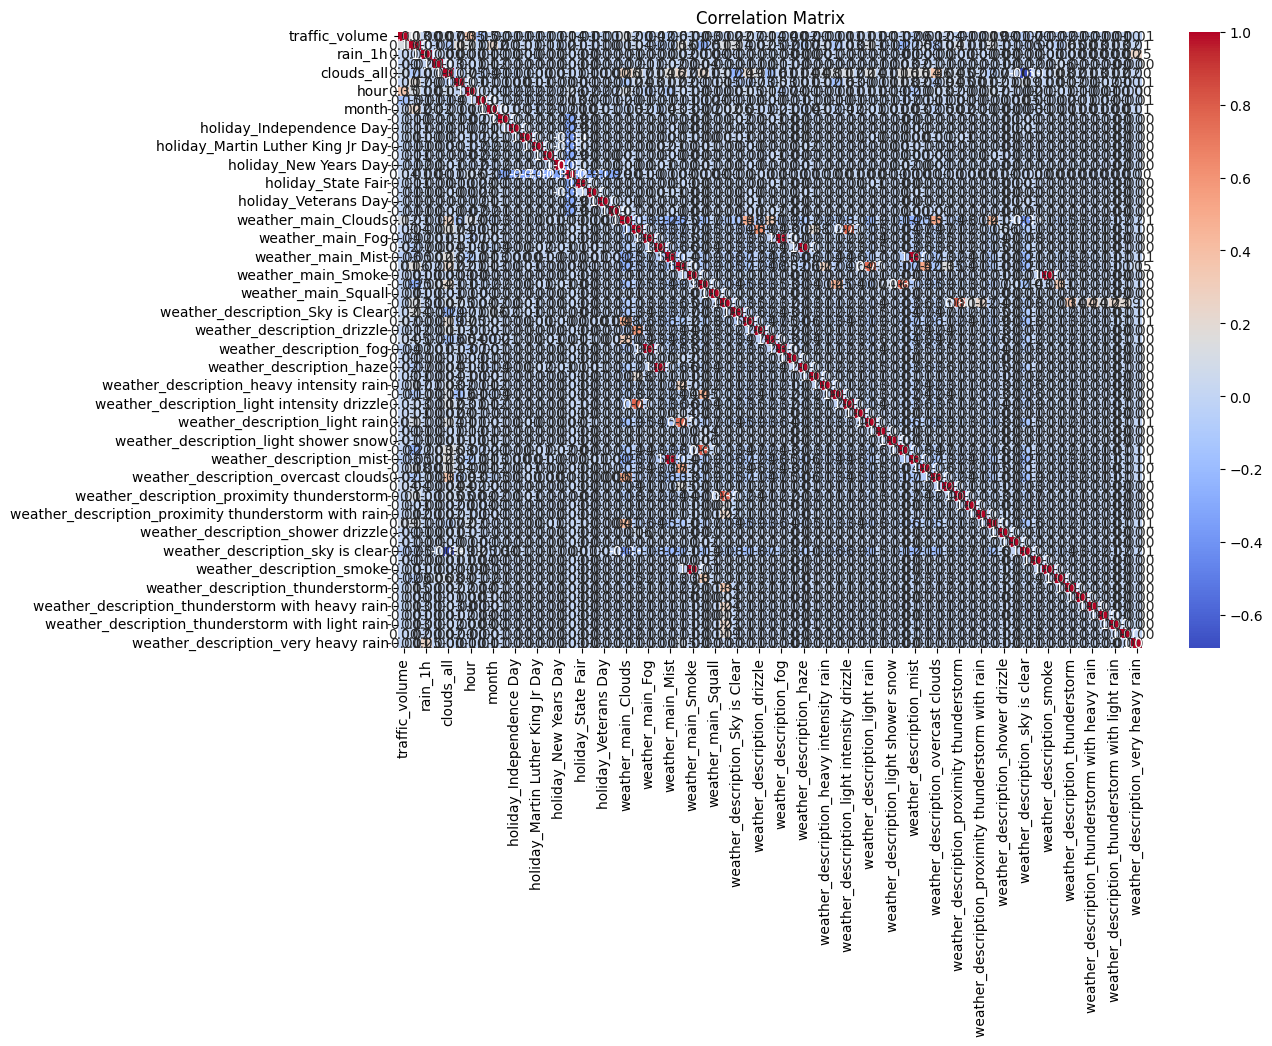

In [10]:
# Plot the correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

KMeans Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


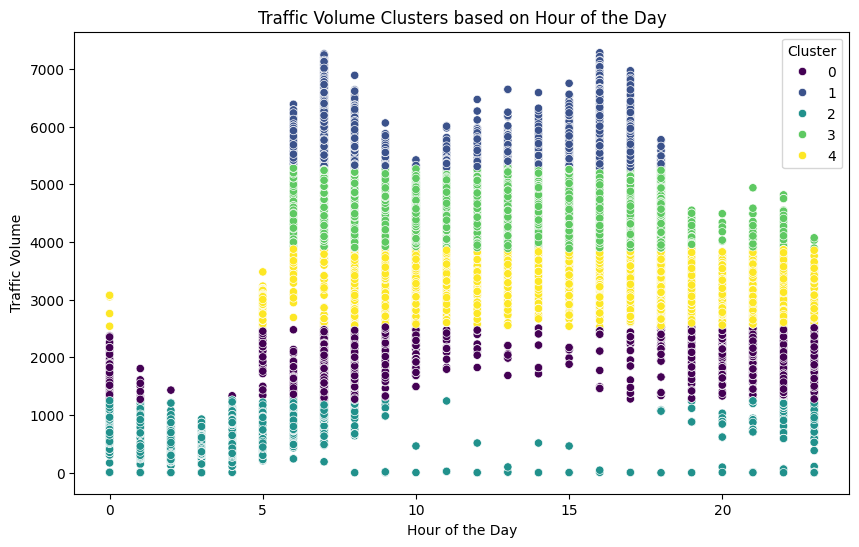

In [11]:
from sklearn.cluster import KMeans

# Select features for clustering
clustering_features = df[['hour', 'day_of_week', 'month', 'traffic_volume']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(clustering_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='hour', y='traffic_volume', hue='cluster', palette='viridis')
plt.title('Traffic Volume Clusters based on Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Volume')
plt.legend(title='Cluster')
plt.show()

Splitting the dataset

In [12]:
from sklearn.model_selection import train_test_split

# Define features and target variable
features = df.drop(['traffic_volume', 'date_time'], axis=1)
target = df['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 Score: {r2}')

Mean Squared Error: 47824.990907583735
Mean Absolute Error: 152.97509170161166
R2 Score: 0.987903167601961


MLP Regressor

In [14]:
from sklearn.neural_network import MLPRegressor

# Initialize and train the model
mlp_model = MLPRegressor(random_state=42, max_iter=1000)
mlp_model.fit(X_train, y_train)

# Make predictions
mlp_predictions = mlp_model.predict(X_test)

# Evaluate the model
mlp_mse = mean_squared_error(y_test, mlp_predictions)
mlp_mae = mean_absolute_error(y_test, mlp_predictions)
mlp_r2 = r2_score(y_test, mlp_predictions)
print(f'MLP Regressor Mean Squared Error: {mlp_mse}')
print(f'Mean Absolute Error: {mlp_mae}')
print(f'R2 Score: {mlp_r2}')

MLP Regressor Mean Squared Error: 686241.7420994032
Mean Absolute Error: 612.0016325155316
R2 Score: 0.8264223122434831


Support Vector Regressor

In [15]:
from sklearn.svm import SVR

# Initialize and train the model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Make predictions
svr_predictions = svr_model.predict(X_test)

# Evaluate the model
svr_mse = mean_squared_error(y_test, svr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)
print(f'Support Vector Regressor Mean Squared Error: {svr_mse}')
print(f'Mean Absolute Error: {svr_mae}')
print(f'R2 Score: {svr_r2}')

Support Vector Regressor Mean Squared Error: 3926451.081012545
Mean Absolute Error: 1737.274335358383
R2 Score: 0.0068451714315692636


XGBoost

In [16]:
import xgboost as xgb

# Initialize and train the model
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)
print(f'XGBoost Mean Squared Error: {xgb_mse}')
print(f'Mean Absolute Error: {xgb_mae}')
print(f'R2 Score: {xgb_r2}')

XGBoost Mean Squared Error: 51077.29044334807
Mean Absolute Error: 162.7841472900726
R2 Score: 0.9870805323720163


Gradient Boosting Regressor

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
print(f'Gradient Boosting Mean Squared Error: {gb_mse}')
print(f'Mean Absolute Error: {gb_mae}')
print(f'R2 Score: {gb_r2}')

Gradient Boosting Mean Squared Error: 101613.04276507534
Mean Absolute Error: 230.71972085405656
R2 Score: 0.974298041160966


Comparing the models

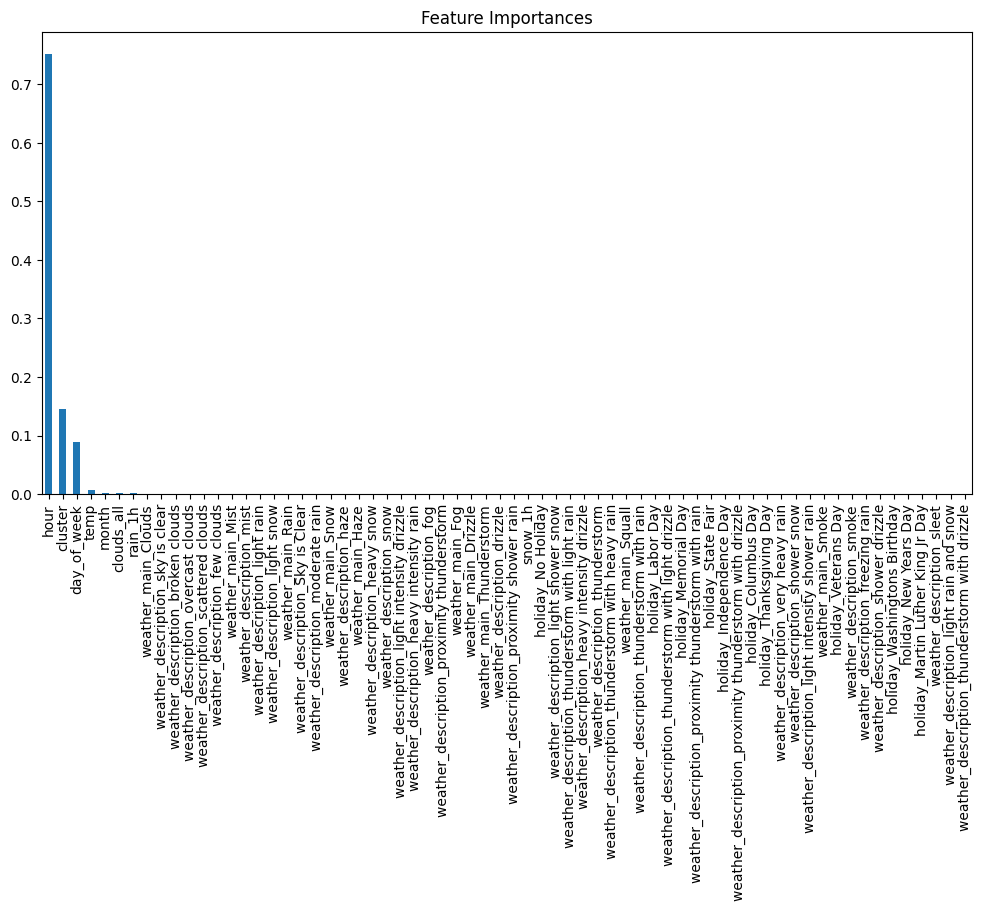

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best Model Mean Squared Error: 46171.31263201152


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Checking feature importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()

# Hyperparameter tuning with RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=10, cv=3, n_jobs=-1, verbose=2, random_state=42)
randomized_search.fit(X_train, y_train)

print(f'Best Parameters: {randomized_search.best_params_}')
best_model = randomized_search.best_estimator_

# Evaluate the best model
best_predictions = best_model.predict(X_test)
best_mse = mean_squared_error(y_test, best_predictions)
print(f'Best Model Mean Squared Error: {best_mse}')


Evaluate the Model Performance

In [20]:
# Make predictions with the best model
best_predictions = best_model.predict(X_test)

# Evaluate the model
best_mse = mean_squared_error(y_test, best_predictions)
best_mae = mean_absolute_error(y_test, best_predictions)
best_r2 = r2_score(y_test, best_predictions)

print(f'Best Model Mean Squared Error: {best_mse}')
print(f'Best Model Mean Absolute Error: {best_mae}')
print(f'Best Model R2 Score: {best_r2}')

Best Model Mean Squared Error: 46171.31263201152
Best Model Mean Absolute Error: 150.73552264218054
Best Model R2 Score: 0.9883214482656945


Visualize Actual vs. Predicted Values

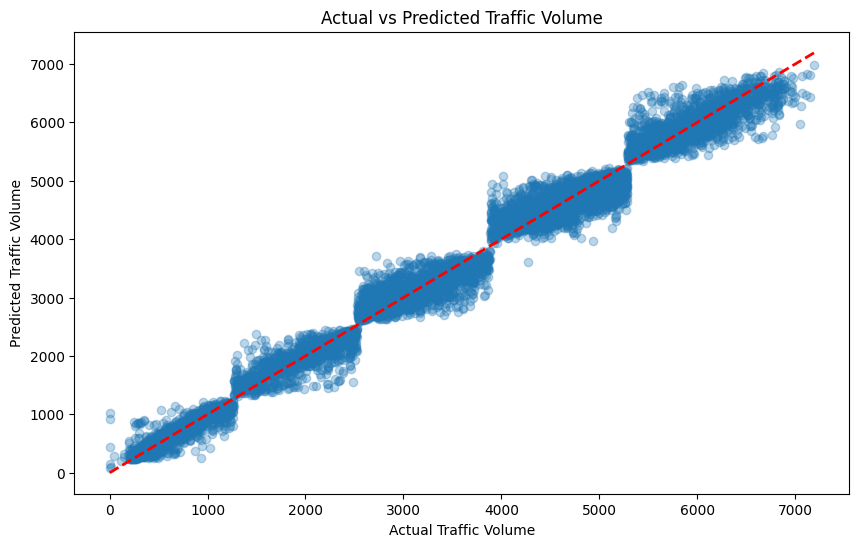

In [21]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.show()

Analyze Residuals

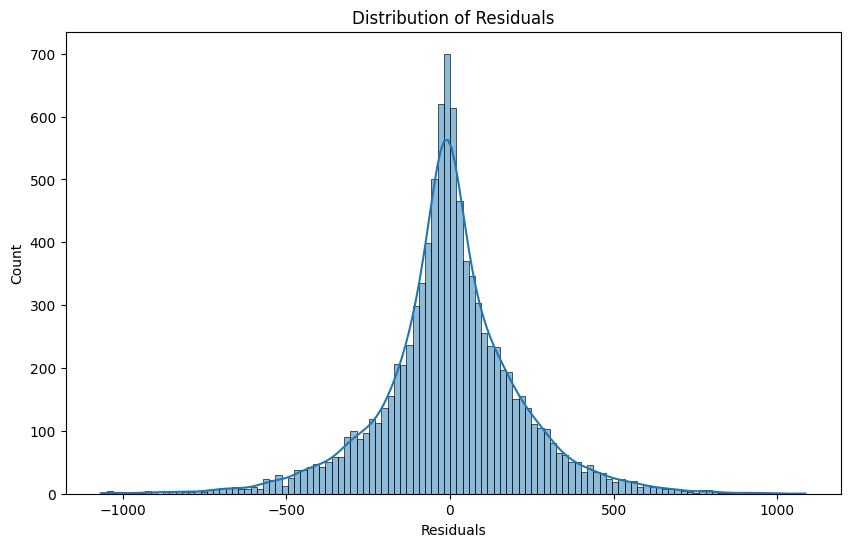

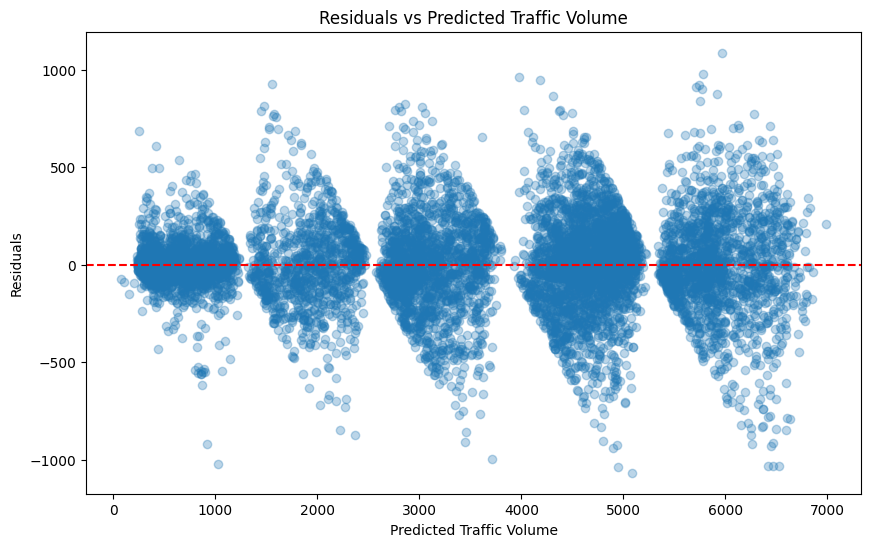

In [22]:
import seaborn as sns

# Calculate residuals
residuals = y_test - best_predictions

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Residuals vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(best_predictions, residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Traffic Volume')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Traffic Volume')
plt.show()
